In [1]:
import json

In [2]:
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

Insat

In [4]:
insat_table=pd.read_csv('/content/drive/MyDrive/insat.csv')

In [5]:
insat_table.head()

,Unnamed: 0.1,Unnamed: 0,timestamp,pixel_count,dt
0,0,0,2022-10-26 01:00:00,7,1666771200
1,1,1,2022-10-26 01:16:00,5,1666772160
2,2,2,2022-10-26 01:31:00,5,1666773060
3,3,3,2022-10-26 01:46:00,5,1666773960
4,4,4,2022-10-26 02:01:00,5,1666774860


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
insat_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  1270 non-null   int64 
 1   Unnamed: 0    1270 non-null   int64 
 2   timestamp     1270 non-null   object
 3   pixel_count   1270 non-null   int64 
 4   dt            1270 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 49.7+ KB


In [8]:
insat_table.dtypes


,0
Unnamed: 0.1,int64
Unnamed: 0,int64
timestamp,object
pixel_count,int64
dt,int64


In [9]:
import time

In [10]:
import calendar

In [11]:

import datetime

In [12]:
insat_table['dt']=insat_table['dt'].astype('int64')

In [13]:
insat_table['timestamp']= pd.to_datetime(insat_table['timestamp'])

In [14]:
insat_table.drop(['Unnamed: 0','Unnamed: 0.1'], axis= 1, inplace=True)

Tidal data

In [15]:
tidal_data=pd.read_json('/content/drive/MyDrive/allTides (1).json',lines=True)

In [16]:
tidal_data.head()

,disclaimer,status,latitude,longitude,origin,datums,timestamp,datetime,unit,timezone,datum,extremes,heights,source,copyright
0,NOT SUITABLE FOR NAVIGATIONAL PURPOSES. Marea ...,200,76.26,9.94,"{'latitude': 76.25, 'longitude': 9.9375, 'dist...","{'LAT': -0.84, 'HAT': 0.752, 'MLLW': -0.475000...",2022-10-26 08:00:18,2022-10-26 08:00:18+00:00,m,UTC,MSL,"[{'timestamp': 1666787226, 'height': 0.5704027...","[{'timestamp': 1666771218, 'height': -0.459390...",FES2014,©2022 Marea | Generated using AVISO+ Products....
1,NOT SUITABLE FOR NAVIGATIONAL PURPOSES. Marea ...,200,76.26,9.94,"{'latitude': 76.25, 'longitude': 9.9375, 'dist...","{'LAT': -0.84, 'HAT': 0.752, 'MLLW': -0.475000...",2022-10-26 08:16:51,2022-10-26 08:16:51+00:00,m,UTC,MSL,"[{'timestamp': 1666787226, 'height': 0.5704027...","[{'timestamp': 1666772211, 'height': -0.388316...",FES2014,©2022 Marea | Generated using AVISO+ Products....
2,NOT SUITABLE FOR NAVIGATIONAL PURPOSES. Marea ...,200,76.26,9.94,"{'latitude': 76.25, 'longitude': 9.9375, 'dist...","{'LAT': -0.84, 'HAT': 0.752, 'MLLW': -0.475000...",2022-10-26 08:31:51,2022-10-26 08:31:51+00:00,m,UTC,MSL,"[{'timestamp': 1666787226, 'height': 0.5704027...","[{'timestamp': 1666773111, 'height': -0.318326...",FES2014,©2022 Marea | Generated using AVISO+ Products....
3,NOT SUITABLE FOR NAVIGATIONAL PURPOSES. Marea ...,200,76.26,9.94,"{'latitude': 76.25, 'longitude': 9.9375, 'dist...","{'LAT': -0.84, 'HAT': 0.752, 'MLLW': -0.475000...",2022-10-26 08:46:51,2022-10-26 08:46:51+00:00,m,UTC,MSL,"[{'timestamp': 1666787226, 'height': 0.5704027...","[{'timestamp': 1666774011, 'height': -0.244201...",FES2014,©2022 Marea | Generated using AVISO+ Products....
4,NOT SUITABLE FOR NAVIGATIONAL PURPOSES. Marea ...,200,76.26,9.94,"{'latitude': 76.25, 'longitude': 9.9375, 'dist...","{'LAT': -0.84, 'HAT': 0.752, 'MLLW': -0.475000...",2022-10-26 09:01:51,2022-10-26 09:01:51+00:00,m,UTC,MSL,"[{'timestamp': 1666787226, 'height': 0.5704027...","[{'timestamp': 1666774911, 'height': -0.167119...",FES2014,©2022 Marea | Generated using AVISO+ Products....


In [17]:
tidal_data= tidal_data[['latitude','longitude','timestamp','datetime','unit','timezone','datum','heights', 'extremes']]

In [18]:
tidal_data

,latitude,longitude,timestamp,datetime,unit,timezone,datum,heights,extremes
0,76.26,9.94,2022-10-26 08:00:18,2022-10-26 08:00:18+00:00,m,UTC,MSL,"[{'timestamp': 1666771218, 'height': -0.459390...","[{'timestamp': 1666787226, 'height': 0.5704027..."
1,76.26,9.94,2022-10-26 08:16:51,2022-10-26 08:16:51+00:00,m,UTC,MSL,"[{'timestamp': 1666772211, 'height': -0.388316...","[{'timestamp': 1666787226, 'height': 0.5704027..."
2,76.26,9.94,2022-10-26 08:31:51,2022-10-26 08:31:51+00:00,m,UTC,MSL,"[{'timestamp': 1666773111, 'height': -0.318326...","[{'timestamp': 1666787226, 'height': 0.5704027..."
3,76.26,9.94,2022-10-26 08:46:51,2022-10-26 08:46:51+00:00,m,UTC,MSL,"[{'timestamp': 1666774011, 'height': -0.244201...","[{'timestamp': 1666787226, 'height': 0.5704027..."
4,76.26,9.94,2022-10-26 09:01:51,2022-10-26 09:01:51+00:00,m,UTC,MSL,"[{'timestamp': 1666774911, 'height': -0.167119...","[{'timestamp': 1666787226, 'height': 0.5704027..."
...,...,...,...,...,...,...,...,...,...
1268,76.26,9.94,2022-11-08 16:29:16,2022-11-08 16:29:16+00:00,m,UTC,MSL,"[{'timestamp': 1667924956, 'height': -0.422229...","[{'timestamp': 1667929980, 'height': -0.557096..."
1269,76.26,9.94,2022-11-08 16:44:15,2022-11-08 16:44:15+00:00,m,UTC,MSL,"[{'timestamp': 1667925855, 'height': -0.464931...","[{'timestamp': 1667929980, 'height': -0.557096..."
1270,76.26,9.94,2022-11-08 16:59:15,2022-11-08 16:59:15+00:00,m,UTC,MSL,"[{'timestamp': 1667926755, 'height': -0.500146...","[{'timestamp': 1667929980, 'height': -0.557096..."
1271,76.26,9.94,2022-11-08 17:14:25,2022-11-08 17:14:25+00:00,m,UTC,MSL,"[{'timestamp': 1667927665, 'height': -0.527510...","[{'timestamp': 1667929980, 'height': -0.557096..."


In [19]:
timeseconds=[]
for i in tidal_data.heights:
    timeseconds.append(i[0]['timestamp'])

In [20]:
tidal_data['timestamps'] = timeseconds

In [21]:
height= []
for i in tidal_data.heights:
    height.append(i[0]['height'])

In [22]:
tidal_data['height']=height


In [23]:
state=[]
for i in tidal_data.heights:
    state.append(i[0]['state'])

In [24]:
tidal_data['state']= state

In [25]:
tidal_data= tidal_data.rename(columns= {'height':'tidal_height','state':'tidal_state'})

In [26]:
tidal_data.drop(['extremes', 'heights'], inplace=True, axis=1)


In [27]:
tidal_data

,latitude,longitude,timestamp,datetime,unit,timezone,datum,timestamps,tidal_height,tidal_state
0,76.26,9.94,2022-10-26 08:00:18,2022-10-26 08:00:18+00:00,m,UTC,MSL,1666771218,-0.459391,RISING
1,76.26,9.94,2022-10-26 08:16:51,2022-10-26 08:16:51+00:00,m,UTC,MSL,1666772211,-0.388316,RISING
2,76.26,9.94,2022-10-26 08:31:51,2022-10-26 08:31:51+00:00,m,UTC,MSL,1666773111,-0.318326,RISING
3,76.26,9.94,2022-10-26 08:46:51,2022-10-26 08:46:51+00:00,m,UTC,MSL,1666774011,-0.244202,RISING
4,76.26,9.94,2022-10-26 09:01:51,2022-10-26 09:01:51+00:00,m,UTC,MSL,1666774911,-0.167120,RISING
...,...,...,...,...,...,...,...,...,...,...
1268,76.26,9.94,2022-11-08 16:29:16,2022-11-08 16:29:16+00:00,m,UTC,MSL,1667924956,-0.422229,FALLING
1269,76.26,9.94,2022-11-08 16:44:15,2022-11-08 16:44:15+00:00,m,UTC,MSL,1667925855,-0.464931,FALLING
1270,76.26,9.94,2022-11-08 16:59:15,2022-11-08 16:59:15+00:00,m,UTC,MSL,1667926755,-0.500146,FALLING
1271,76.26,9.94,2022-11-08 17:14:25,2022-11-08 17:14:25+00:00,m,UTC,MSL,1667927665,-0.527511,FALLING


Weather data

In [28]:
weather_data= pd.read_json(r"/content/drive/MyDrive/allWeather.json", lines=True)

In [29]:
weather_data

,coord,weather,base,main,visibility,wind,clouds,dt,sys,timezone,id,name,cod,snow,rain
0,"{'lon': 9.94, 'lat': 76.26}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 271.89, 'feels_like': 266.75, 'temp_m...",7077,"{'speed': 4.85, 'deg': 87, 'gust': 4.71}",{'all': 100},1666771218,"{'sunrise': 1666774297, 'sunset': 1666790195}",3600,0,,200,NaN,NaN
1,"{'lon': 9.94, 'lat': 76.26}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 271.89, 'feels_like': 266.75, 'temp_m...",7077,"{'speed': 4.85, 'deg': 87, 'gust': 4.71}",{'all': 100},1666772211,"{'sunrise': 1666774297, 'sunset': 1666790195}",3600,0,,200,NaN,NaN
2,"{'lon': 9.94, 'lat': 76.26}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 272.08, 'feels_like': 266.87, 'temp_m...",10000,"{'speed': 5.04, 'deg': 84, 'gust': 4.55}",{'all': 100},1666773111,"{'sunrise': 1666774297, 'sunset': 1666790195}",3600,0,,200,NaN,NaN
3,"{'lon': 9.94, 'lat': 76.26}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 272.08, 'feels_like': 266.87, 'temp_m...",10000,"{'speed': 5.04, 'deg': 84, 'gust': 4.55}",{'all': 100},1666774011,"{'sunrise': 1666774297, 'sunset': 1666790195}",3600,0,,200,NaN,NaN
4,"{'lon': 9.94, 'lat': 76.26}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 272.08, 'feels_like': 266.87, 'temp_m...",10000,"{'speed': 5.04, 'deg': 84, 'gust': 4.55}",{'all': 100},1666774911,"{'sunrise': 1666774297, 'sunset': 1666790195}",3600,0,,200,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,"{'lon': 9.94, 'lat': 76.26}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 273.05, 'feels_like': 271.53, 'temp_m...",10000,"{'speed': 1.35, 'deg': 41, 'gust': 1.05}",{'all': 100},1667924955,"{'sunrise': 0, 'sunset': 0}",3600,0,,200,NaN,NaN
1269,"{'lon': 9.94, 'lat': 76.26}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 273.1, 'feels_like': 273.1, 'temp_min...",10000,"{'speed': 1.3, 'deg': 57, 'gust': 1.13}",{'all': 100},1667925856,"{'sunrise': 0, 'sunset': 0}",3600,0,,200,NaN,NaN
1270,"{'lon': 9.94, 'lat': 76.26}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 273.1, 'feels_like': 273.1, 'temp_min...",10000,"{'speed': 1.3, 'deg': 57, 'gust': 1.13}",{'all': 100},1667926755,"{'sunrise': 0, 'sunset': 0}",3600,0,,200,NaN,NaN
1271,"{'lon': 9.94, 'lat': 76.26}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 273.1, 'feels_like': 273.1, 'temp_min...",10000,"{'speed': 1.3, 'deg': 57, 'gust': 1.13}",{'all': 100},1667927670,"{'sunrise': 0, 'sunset': 0}",3600,0,,200,NaN,NaN


In [30]:
weather_data= weather_data[['weather','main','clouds','dt','rain']]

In [31]:
weather_data

,weather,main,clouds,dt,rain
0,"[{'id': 804, 'main': 'Clouds', 'description': ...","{'temp': 271.89, 'feels_like': 266.75, 'temp_m...",{'all': 100},1666771218,NaN
1,"[{'id': 804, 'main': 'Clouds', 'description': ...","{'temp': 271.89, 'feels_like': 266.75, 'temp_m...",{'all': 100},1666772211,NaN
2,"[{'id': 804, 'main': 'Clouds', 'description': ...","{'temp': 272.08, 'feels_like': 266.87, 'temp_m...",{'all': 100},1666773111,NaN
3,"[{'id': 804, 'main': 'Clouds', 'description': ...","{'temp': 272.08, 'feels_like': 266.87, 'temp_m...",{'all': 100},1666774011,NaN
4,"[{'id': 804, 'main': 'Clouds', 'description': ...","{'temp': 272.08, 'feels_like': 266.87, 'temp_m...",{'all': 100},1666774911,NaN
...,...,...,...,...,...
1268,"[{'id': 804, 'main': 'Clouds', 'description': ...","{'temp': 273.05, 'feels_like': 271.53, 'temp_m...",{'all': 100},1667924955,NaN
1269,"[{'id': 804, 'main': 'Clouds', 'description': ...","{'temp': 273.1, 'feels_like': 273.1, 'temp_min...",{'all': 100},1667925856,NaN
1270,"[{'id': 804, 'main': 'Clouds', 'description': ...","{'temp': 273.1, 'feels_like': 273.1, 'temp_min...",{'all': 100},1667926755,NaN
1271,"[{'id': 804, 'main': 'Clouds', 'description': ...","{'temp': 273.1, 'feels_like': 273.1, 'temp_min...",{'all': 100},1667927670,NaN


In [32]:
rainfall=[]
for i in weather_data.weather:
    rainfall.append(i[0]['main'])

In [33]:
weather_data['Weather'] = rainfall

In [34]:
weather_data.rain

,rain
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1268,NaN
1269,NaN
1270,NaN
1271,NaN


In [35]:
typeweather=[]
for i in weather_data.weather:
    typeweather.append(i[0]['description'])

In [36]:
weather_data['Weather_description'] = typeweather

In [37]:
humidity=[]

for i in weather_data.main:
    humidity.append(i['humidity'])

In [38]:
weather_data['humidity'] = humidity

In [39]:
clouds= []

for i in weather_data.clouds:
    clouds.append(i['all'])

In [40]:
weather_data['cloudiness'] = clouds

In [41]:
weather_data.drop(['weather','main','clouds'], axis=1, inplace=True)

In [42]:
weather_data

,dt,rain,Weather,Weather_description,humidity,cloudiness
0,1666771218,NaN,Clouds,overcast clouds,56,100
1,1666772211,NaN,Clouds,overcast clouds,56,100
2,1666773111,NaN,Clouds,overcast clouds,52,100
3,1666774011,NaN,Clouds,overcast clouds,52,100
4,1666774911,NaN,Clouds,overcast clouds,52,100
...,...,...,...,...,...,...
1268,1667924955,NaN,Clouds,overcast clouds,59,100
1269,1667925856,NaN,Clouds,overcast clouds,59,100
1270,1667926755,NaN,Clouds,overcast clouds,59,100
1271,1667927670,NaN,Clouds,overcast clouds,59,100


In [43]:
weather_data.rain.fillna(0,inplace=True)

In [44]:
weather_data

,dt,rain,Weather,Weather_description,humidity,cloudiness
0,1666771218,0,Clouds,overcast clouds,56,100
1,1666772211,0,Clouds,overcast clouds,56,100
2,1666773111,0,Clouds,overcast clouds,52,100
3,1666774011,0,Clouds,overcast clouds,52,100
4,1666774911,0,Clouds,overcast clouds,52,100
...,...,...,...,...,...,...
1268,1667924955,0,Clouds,overcast clouds,59,100
1269,1667925856,0,Clouds,overcast clouds,59,100
1270,1667926755,0,Clouds,overcast clouds,59,100
1271,1667927670,0,Clouds,overcast clouds,59,100


In [45]:
weather_data['rain'] = weather_data.rain.apply(lambda x: x.get('1h',0) if x != 0 else x)

Merging the column

In [46]:
weather_data[weather_data.rain!=0]

,dt,rain,Weather,Weather_description,humidity,cloudiness
114,1666873911,0.41,Rain,light rain,88,100
115,1666874811,0.41,Rain,light rain,88,100
116,1666875711,0.41,Rain,light rain,88,100
117,1666876611,0.41,Rain,light rain,88,100
118,1666877511,0.26,Rain,light rain,85,100
...,...,...,...,...,...,...
1031,1667708055,0.12,Rain,light rain,82,100
1032,1667708955,0.12,Rain,light rain,82,100
1157,1667825055,0.12,Rain,light rain,84,100
1158,1667825955,0.12,Rain,light rain,84,100


In [47]:
tidal_data

,latitude,longitude,timestamp,datetime,unit,timezone,datum,timestamps,tidal_height,tidal_state
0,76.26,9.94,2022-10-26 08:00:18,2022-10-26 08:00:18+00:00,m,UTC,MSL,1666771218,-0.459391,RISING
1,76.26,9.94,2022-10-26 08:16:51,2022-10-26 08:16:51+00:00,m,UTC,MSL,1666772211,-0.388316,RISING
2,76.26,9.94,2022-10-26 08:31:51,2022-10-26 08:31:51+00:00,m,UTC,MSL,1666773111,-0.318326,RISING
3,76.26,9.94,2022-10-26 08:46:51,2022-10-26 08:46:51+00:00,m,UTC,MSL,1666774011,-0.244202,RISING
4,76.26,9.94,2022-10-26 09:01:51,2022-10-26 09:01:51+00:00,m,UTC,MSL,1666774911,-0.167120,RISING
...,...,...,...,...,...,...,...,...,...,...
1268,76.26,9.94,2022-11-08 16:29:16,2022-11-08 16:29:16+00:00,m,UTC,MSL,1667924956,-0.422229,FALLING
1269,76.26,9.94,2022-11-08 16:44:15,2022-11-08 16:44:15+00:00,m,UTC,MSL,1667925855,-0.464931,FALLING
1270,76.26,9.94,2022-11-08 16:59:15,2022-11-08 16:59:15+00:00,m,UTC,MSL,1667926755,-0.500146,FALLING
1271,76.26,9.94,2022-11-08 17:14:25,2022-11-08 17:14:25+00:00,m,UTC,MSL,1667927665,-0.527511,FALLING


In [48]:
merged_data= pd.merge(weather_data, tidal_data, left_on= 'dt', right_on= 'timestamps')

In [49]:
merged_data.dtypes

,0
dt,int64
rain,float64
Weather,object
Weather_description,object
humidity,int64
cloudiness,int64
latitude,float64
longitude,float64
timestamp,datetime64[ns]
datetime,"datetime64[ns, UTC]"


In [50]:
insat_table

,timestamp,pixel_count,dt
0,2022-10-26 01:00:00,7,1666771200
1,2022-10-26 01:16:00,5,1666772160
2,2022-10-26 01:31:00,5,1666773060
3,2022-10-26 01:46:00,5,1666773960
4,2022-10-26 02:01:00,5,1666774860
...,...,...,...
1265,2022-11-08 08:59:00,26,1667923140
1266,2022-11-08 09:14:00,32,1667924040
1267,2022-11-08 09:29:00,32,1667924940
1268,2022-11-10 10:29:00,24,1668101340


In [51]:
merged_data= pd.merge_asof(merged_data, insat_table, left_on= 'timestamp',right_on= 'timestamp', allow_exact_matches= False)

In [52]:
merged_data

,dt_x,rain,Weather,Weather_description,humidity,cloudiness,latitude,longitude,timestamp,datetime,unit,timezone,datum,timestamps,tidal_height,tidal_state,pixel_count,dt_y
0,1666771218,0.0,Clouds,overcast clouds,56,100,76.26,9.94,2022-10-26 08:00:18,2022-10-26 08:00:18+00:00,m,UTC,MSL,1666771218,-0.459391,RISING,8,1666795560
1,1666772211,0.0,Clouds,overcast clouds,56,100,76.26,9.94,2022-10-26 08:16:51,2022-10-26 08:16:51+00:00,m,UTC,MSL,1666772211,-0.388316,RISING,6,1666797360
2,1666773111,0.0,Clouds,overcast clouds,52,100,76.26,9.94,2022-10-26 08:31:51,2022-10-26 08:31:51+00:00,m,UTC,MSL,1666773111,-0.318326,RISING,6,1666798260
3,1666774011,0.0,Clouds,overcast clouds,52,100,76.26,9.94,2022-10-26 08:46:51,2022-10-26 08:46:51+00:00,m,UTC,MSL,1666774011,-0.244202,RISING,6,1666799160
4,1666774911,0.0,Clouds,overcast clouds,52,100,76.26,9.94,2022-10-26 09:01:51,2022-10-26 09:01:51+00:00,m,UTC,MSL,1666774911,-0.167120,RISING,5,1666800060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,1667919555,0.0,Clouds,overcast clouds,59,100,76.26,9.94,2022-11-08 14:59:15,2022-11-08 14:59:15+00:00,m,UTC,MSL,1667919555,-0.052566,FALLING,32,1667924940
1141,1667922255,0.0,Clouds,overcast clouds,59,100,76.26,9.94,2022-11-08 15:44:15,2022-11-08 15:44:15+00:00,m,UTC,MSL,1667922255,-0.256078,FALLING,32,1667924940
1142,1667923155,0.0,Clouds,overcast clouds,59,100,76.26,9.94,2022-11-08 15:59:15,2022-11-08 15:59:15+00:00,m,UTC,MSL,1667923155,-0.316911,FALLING,32,1667924940
1143,1667926755,0.0,Clouds,overcast clouds,59,100,76.26,9.94,2022-11-08 16:59:15,2022-11-08 16:59:15+00:00,m,UTC,MSL,1667926755,-0.500146,FALLING,32,1667924940


Dropping irrelevant columns

In [53]:
merged_data.drop(['dt_y','datum','timezone','unit','datetime','dt_x'], axis= 1, inplace= True)

In [54]:
merged_data.isnull().sum()

,0
rain,0
Weather,0
Weather_description,0
humidity,0
cloudiness,0
latitude,0
longitude,0
timestamp,0
timestamps,0
tidal_height,0


Defining the Target Variable Based on certain Thresholds

In [55]:
import numpy as np

In [56]:
merged_data['target'] = np.where(((merged_data['humidity'] >90) & (merged_data['tidal_height'] >0.6) |
                                  (merged_data['Weather_description'].isin(['moderate rain','light rain']))), 1,0)

In [57]:
merged_data.head()

,rain,Weather,Weather_description,humidity,cloudiness,latitude,longitude,timestamp,timestamps,tidal_height,tidal_state,pixel_count,target
0,0.0,Clouds,overcast clouds,56,100,76.26,9.94,2022-10-26 08:00:18,1666771218,-0.459391,RISING,8,0
1,0.0,Clouds,overcast clouds,56,100,76.26,9.94,2022-10-26 08:16:51,1666772211,-0.388316,RISING,6,0
2,0.0,Clouds,overcast clouds,52,100,76.26,9.94,2022-10-26 08:31:51,1666773111,-0.318326,RISING,6,0
3,0.0,Clouds,overcast clouds,52,100,76.26,9.94,2022-10-26 08:46:51,1666774011,-0.244202,RISING,6,0
4,0.0,Clouds,overcast clouds,52,100,76.26,9.94,2022-10-26 09:01:51,1666774911,-0.167120,RISING,5,0


EDA

In [58]:
merged_data1= merged_data.select_dtypes(include= ['int','float'])
merged_data1.drop(['latitude','longitude'], axis= 1, inplace= True)

In [59]:
import seaborn as sns

<Axes: >

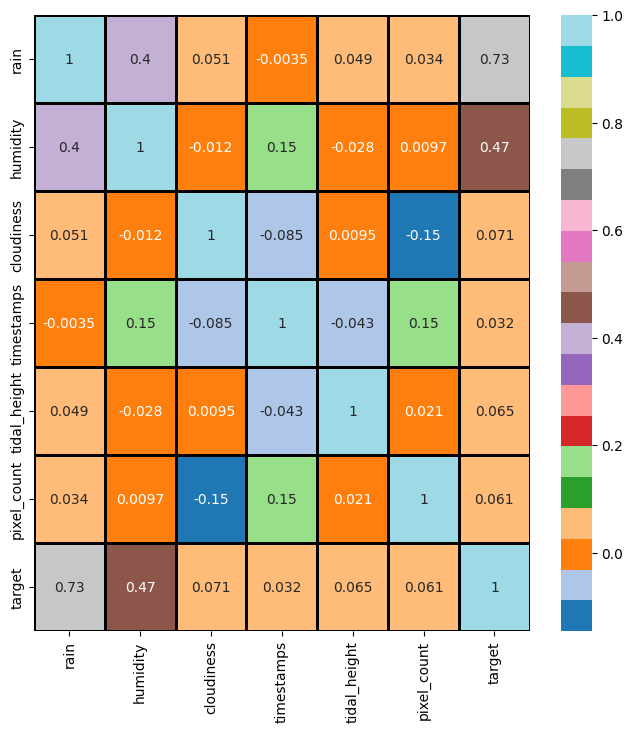

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize= (8,8))
sns.heatmap(merged_data1.corr(), cmap= "tab20", annot= True, linewidth= 2, linecolor= 'black')

Text(0.5, 0, 'Tidal State')

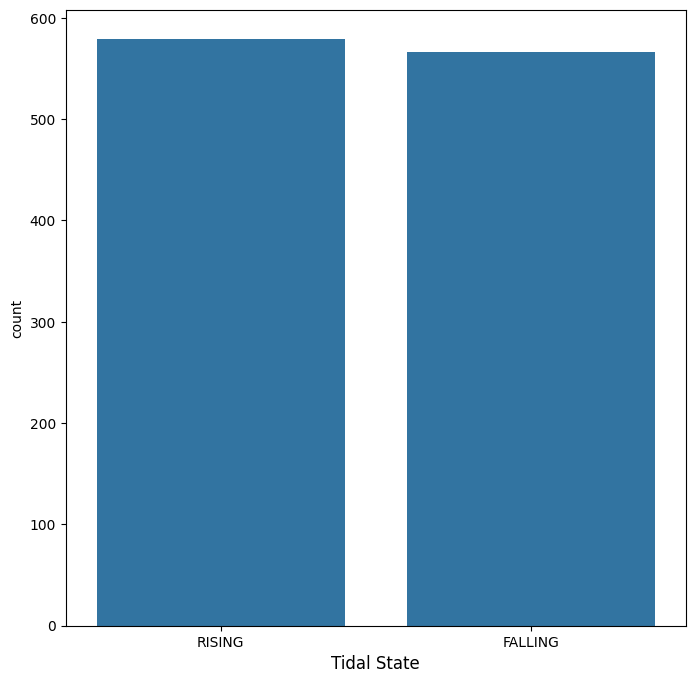

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize= (8,8))
sns.countplot(data= merged_data, x="tidal_state")
plt.xlabel("Tidal State", size= 12)

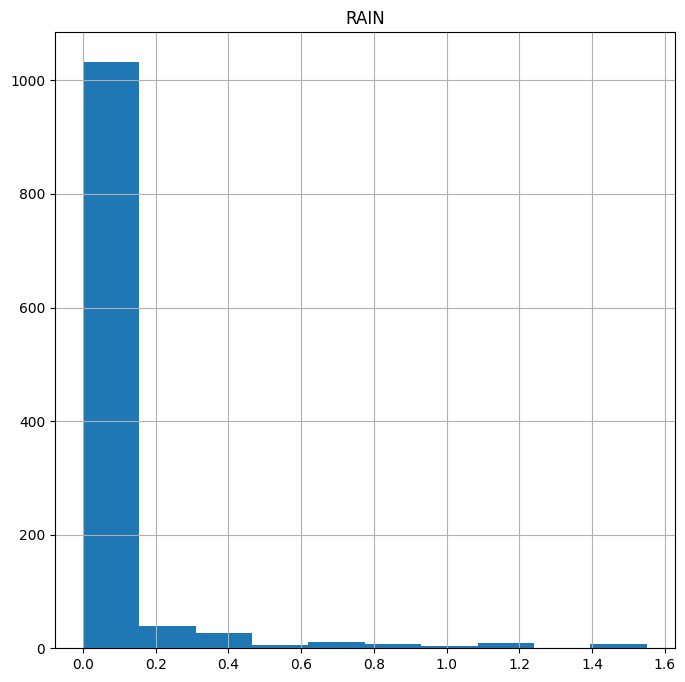

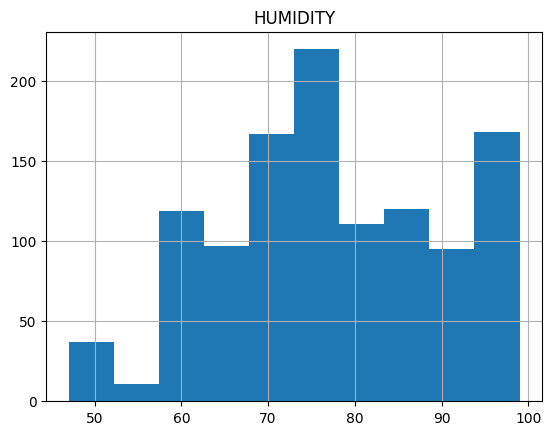

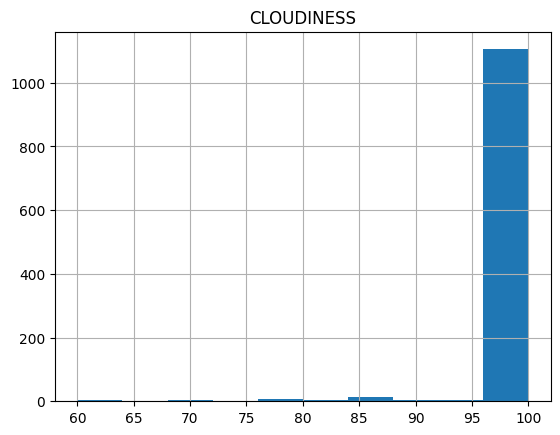

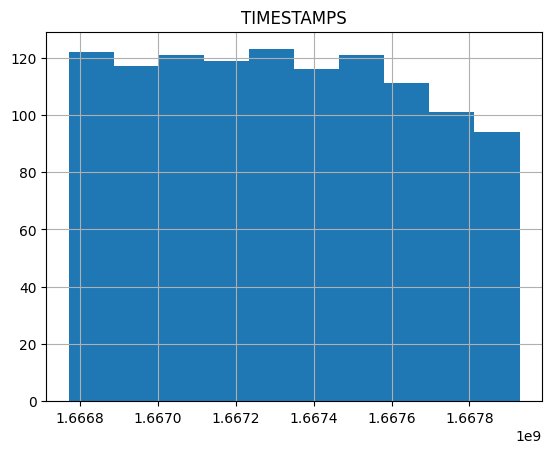

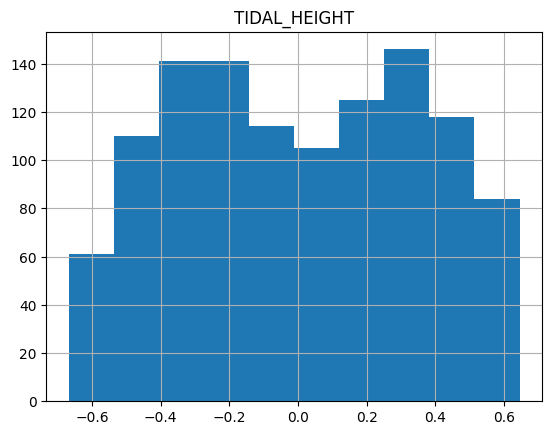

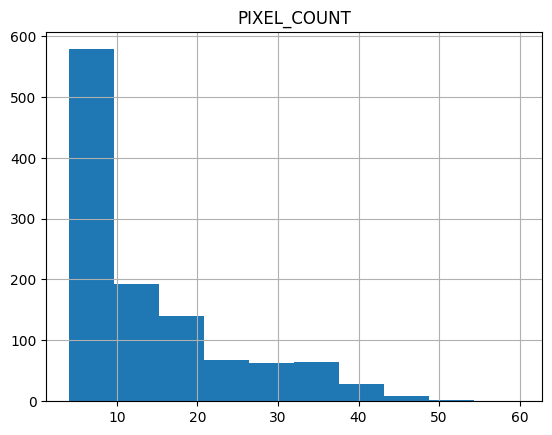

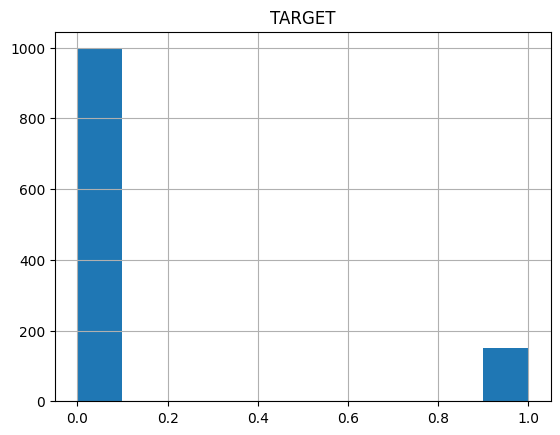

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize= (8,8))
for i in merged_data1:
    merged_data1[i].hist()
    plt.title(i.upper(), size= 12)
    plt.show()

Text(0, 0.5, 'tidal_height')

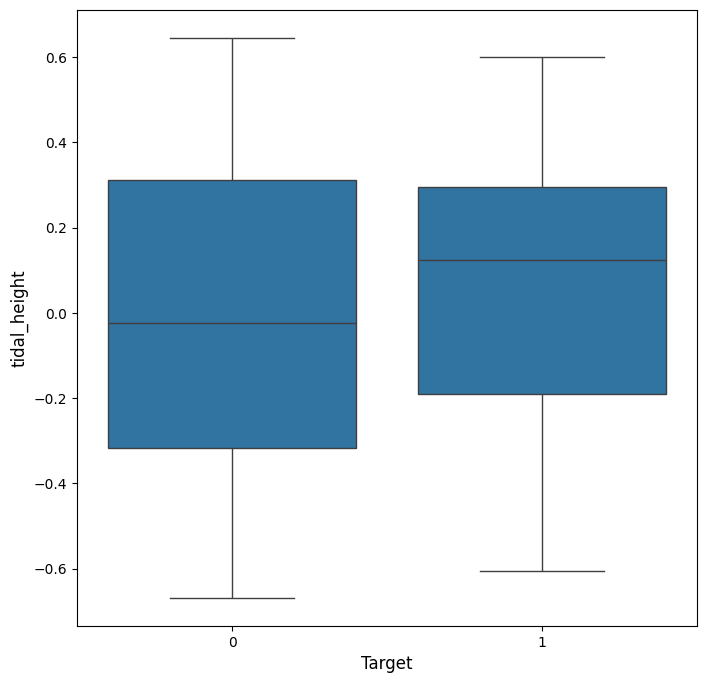

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize= (8,8))
sns.boxplot(data= merged_data1,x= 'target', y='tidal_height')
plt.xlabel("Target", size= 12)
plt.ylabel('tidal_height', size= 12)

Text(0, 0.5, 'humidity')

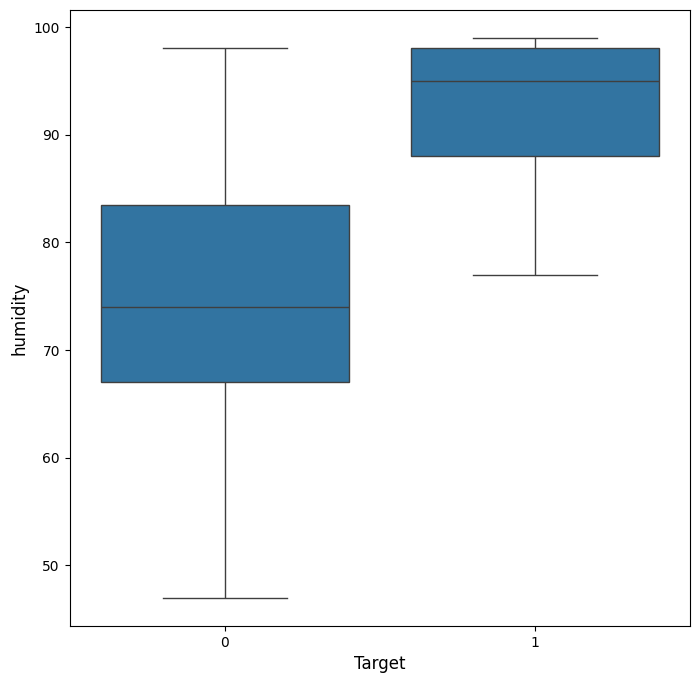

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize= (8,8))
sns.boxplot(data= merged_data1,x= 'target', y='humidity')
plt.xlabel("Target", size= 12)
plt.ylabel('humidity', size= 12)

<Figure size 800x800 with 0 Axes>

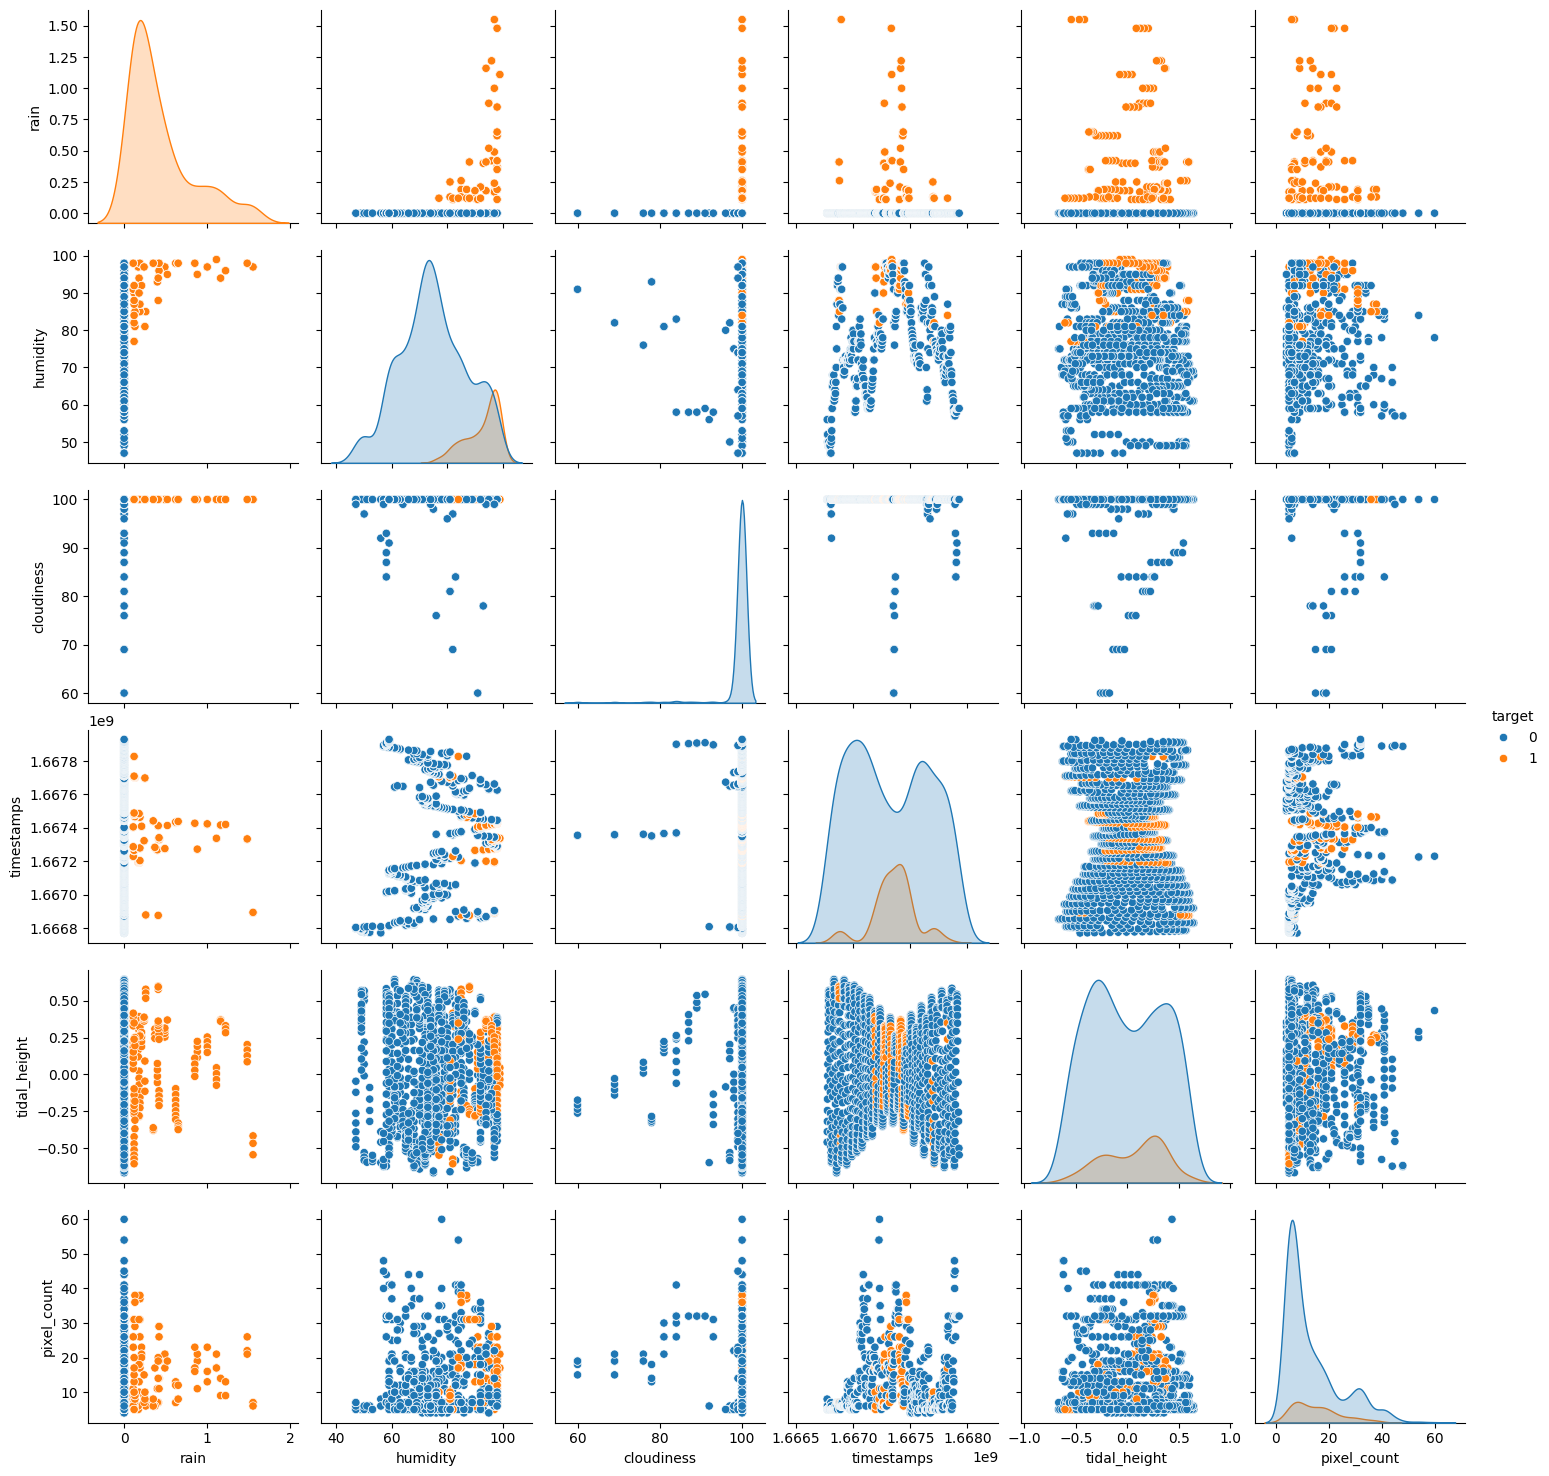

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize= (8,8))
sns.pairplot(merged_data1, hue= 'target')

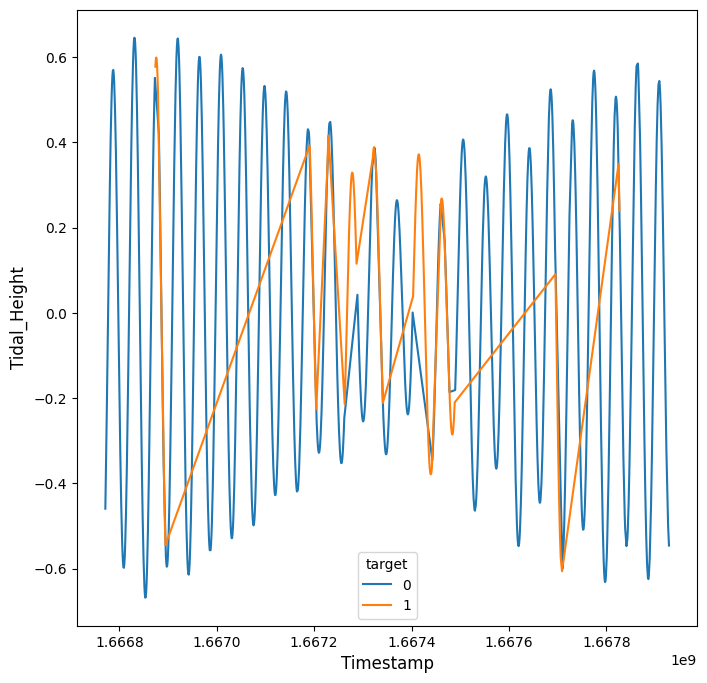

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize= (8,8))
sns.lineplot(data= merged_data1, x= "timestamps", y="tidal_height",hue= 'target')
plt.xlabel('Timestamp', size= 12)
plt.ylabel('Tidal_Height', size= 12)
plt.show()

In [67]:
import matplotlib.pyplot as plt

<Axes: xlabel='tidal_state', ylabel='count'>

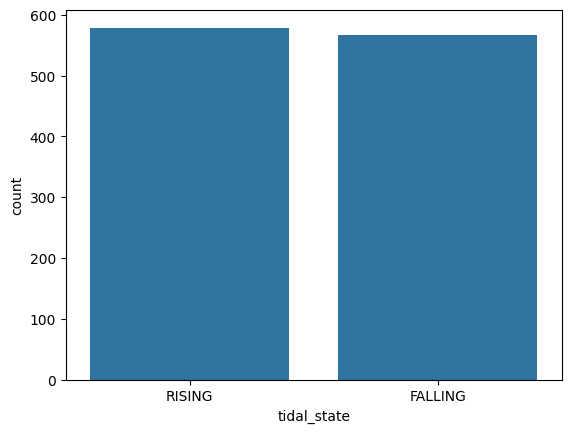

In [68]:
sns.countplot(data= merged_data, x= 'tidal_state')

Text(0, 0.5, 'Rain')

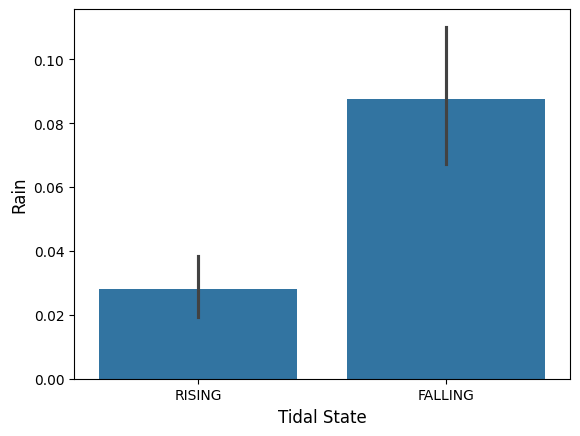

In [69]:
sns.barplot(data= merged_data, x= 'tidal_state', y='rain' )
plt.xlabel('Tidal State', size= 12)
plt.ylabel('Rain', size= 12)

Data cleaning

In [70]:
merged_new= pd.get_dummies(merged_data,columns=['tidal_state','Weather_description'])

In [71]:
merged_new.head()

,rain,Weather,humidity,cloudiness,latitude,longitude,timestamp,timestamps,tidal_height,pixel_count,target,tidal_state_FALLING,tidal_state_RISING,Weather_description_broken clouds,Weather_description_light rain,Weather_description_light snow,Weather_description_moderate rain,Weather_description_overcast clouds,Weather_description_snow
0,0.0,Clouds,56,100,76.26,9.94,2022-10-26 08:00:18,1666771218,-0.459391,8,0,False,True,False,False,False,False,True,False
1,0.0,Clouds,56,100,76.26,9.94,2022-10-26 08:16:51,1666772211,-0.388316,6,0,False,True,False,False,False,False,True,False
2,0.0,Clouds,52,100,76.26,9.94,2022-10-26 08:31:51,1666773111,-0.318326,6,0,False,True,False,False,False,False,True,False
3,0.0,Clouds,52,100,76.26,9.94,2022-10-26 08:46:51,1666774011,-0.244202,6,0,False,True,False,False,False,False,True,False
4,0.0,Clouds,52,100,76.26,9.94,2022-10-26 09:01:51,1666774911,-0.167120,5,0,False,True,False,False,False,False,True,False


In [72]:
merged_new.drop(['tidal_state_FALLING','Weather_description_snow'],inplace=True,axis=1)

Data Normalisation

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
X= merged_new[['humidity','tidal_height','tidal_state_RISING','cloudiness','Weather_description_light snow','Weather_description_moderate rain','Weather_description_light rain','Weather_description_overcast clouds','pixel_count']].values

In [75]:
scaler= MinMaxScaler()
X= scaler.fit_transform(X)

In [76]:
X

array([[0.17307692, 0.15897912, 1.        , ..., 0.        , 1.        ,
        0.07142857],
       [0.17307692, 0.21308368, 1.        , ..., 0.        , 1.        ,
        0.03571429],
       [0.09615385, 0.26636276, 1.        , ..., 0.        , 1.        ,
        0.03571429],
       ...,
       [0.23076923, 0.26744051, 0.        , ..., 0.        , 1.        ,
        0.5       ],
       [0.23076923, 0.12795419, 0.        , ..., 0.        , 1.        ,
        0.5       ],
       [0.23076923, 0.09313239, 0.        , ..., 0.        , 1.        ,
        0.5       ]])

In [77]:
col= ['humidity','cloudiness','tidal_height','tidal_state_RISING','Weather_description_light snow','Weather_description_moderate rain','Weather_description_light rain','Weather_description_overcast clouds','pixel_count']

In [78]:
k= 0
for i in col:
    merged_new[i] = X[:,k]
    k = k +1

In [79]:
merged_new.head()

,rain,Weather,humidity,cloudiness,latitude,longitude,timestamp,timestamps,tidal_height,pixel_count,target,tidal_state_RISING,Weather_description_broken clouds,Weather_description_light rain,Weather_description_light snow,Weather_description_moderate rain,Weather_description_overcast clouds
0,0.0,Clouds,0.173077,0.158979,76.26,9.94,2022-10-26 08:00:18,1666771218,1.0,0.071429,0,1.0,False,0.0,0.0,0.0,1.0
1,0.0,Clouds,0.173077,0.213084,76.26,9.94,2022-10-26 08:16:51,1666772211,1.0,0.035714,0,1.0,False,0.0,0.0,0.0,1.0
2,0.0,Clouds,0.096154,0.266363,76.26,9.94,2022-10-26 08:31:51,1666773111,1.0,0.035714,0,1.0,False,0.0,0.0,0.0,1.0
3,0.0,Clouds,0.096154,0.322790,76.26,9.94,2022-10-26 08:46:51,1666774011,1.0,0.035714,0,1.0,False,0.0,0.0,0.0,1.0
4,0.0,Clouds,0.096154,0.381467,76.26,9.94,2022-10-26 09:01:51,1666774911,1.0,0.017857,0,1.0,False,0.0,0.0,0.0,1.0


In [80]:
merged_new

,rain,Weather,humidity,cloudiness,latitude,longitude,timestamp,timestamps,tidal_height,pixel_count,target,tidal_state_RISING,Weather_description_broken clouds,Weather_description_light rain,Weather_description_light snow,Weather_description_moderate rain,Weather_description_overcast clouds
0,0.0,Clouds,0.173077,0.158979,76.26,9.94,2022-10-26 08:00:18,1666771218,1.0,0.071429,0,1.0,False,0.0,0.0,0.0,1.0
1,0.0,Clouds,0.173077,0.213084,76.26,9.94,2022-10-26 08:16:51,1666772211,1.0,0.035714,0,1.0,False,0.0,0.0,0.0,1.0
2,0.0,Clouds,0.096154,0.266363,76.26,9.94,2022-10-26 08:31:51,1666773111,1.0,0.035714,0,1.0,False,0.0,0.0,0.0,1.0
3,0.0,Clouds,0.096154,0.322790,76.26,9.94,2022-10-26 08:46:51,1666774011,1.0,0.035714,0,1.0,False,0.0,0.0,0.0,1.0
4,0.0,Clouds,0.096154,0.381467,76.26,9.94,2022-10-26 09:01:51,1666774911,1.0,0.017857,0,1.0,False,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,0.0,Clouds,0.230769,0.468670,76.26,9.94,2022-11-08 14:59:15,1667919555,0.0,0.500000,0,1.0,False,0.0,0.0,0.0,1.0
1141,0.0,Clouds,0.230769,0.313749,76.26,9.94,2022-11-08 15:44:15,1667922255,0.0,0.500000,0,1.0,False,0.0,0.0,0.0,1.0
1142,0.0,Clouds,0.230769,0.267441,76.26,9.94,2022-11-08 15:59:15,1667923155,0.0,0.500000,0,1.0,False,0.0,0.0,0.0,1.0
1143,0.0,Clouds,0.230769,0.127954,76.26,9.94,2022-11-08 16:59:15,1667926755,0.0,0.500000,0,1.0,False,0.0,0.0,0.0,1.0


In [81]:
target= merged_new.pop('target')

In [82]:
merged_new['target'] = target

Splitting the time series data into training and testing using iloc

Training Data

In [83]:
merged_new.drop('Weather_description_light snow', axis=1, inplace= True)

In [84]:
len(merged_data)*0.8

916.0

In [85]:
trained_data= merged_new[:int(len(merged_data)*0.8)]
trained_data.drop('Weather',axis=1,inplace=True)

In [86]:
trained_data.drop(['latitude','longitude','timestamp','timestamps'],axis= 1, inplace= True)

In [87]:
x_train= trained_data.iloc[:,:-1].values

In [88]:
x_train


array([[0.0, 0.17307692307692324, 0.1589791179599243, ..., 0.0, 0.0, 1.0],
       [0.0, 0.17307692307692324, 0.21308368325062116, ..., 0.0, 0.0,
        1.0],
       [0.0, 0.09615384615384615, 0.2663627564829444, ..., 0.0, 0.0, 1.0],
       ...,
       [0.0, 0.9038461538461539, 0.348876578988937, ..., 0.0, 0.0, 0.0],
       [0.0, 0.9038461538461539, 0.31261099881937227, ..., 0.0, 0.0, 0.0],
       [0.0, 0.9038461538461539, 0.2792490990783627, ..., 0.0, 0.0, 0.0]],
      dtype=object)

In [89]:
y_train= trained_data.iloc[:,-1].values

In [90]:
int(len(merged_data)*0.8),int(len(merged_data)*0.2), 916+229

(916, 229, 1145)

In [91]:
test= merged_new[916:1146]

In [92]:
test

,rain,Weather,humidity,cloudiness,latitude,longitude,timestamp,timestamps,tidal_height,pixel_count,tidal_state_RISING,Weather_description_broken clouds,Weather_description_light rain,Weather_description_moderate rain,Weather_description_overcast clouds,target
916,0.0,Snow,0.903846,0.249399,76.26,9.94,2022-11-05 14:29:15,1667658555,0.0,0.303571,0.975,False,0.0,0.0,0.0,0
917,0.0,Snow,0.961538,0.223616,76.26,9.94,2022-11-05 14:44:15,1667659455,0.0,0.321429,0.975,False,0.0,0.0,0.0,0
918,0.0,Snow,0.961538,0.202388,76.26,9.94,2022-11-05 14:59:15,1667660355,0.0,0.321429,0.975,False,0.0,0.0,0.0,0
919,0.0,Snow,0.961538,0.175149,76.26,9.94,2022-11-05 15:29:15,1667662155,0.0,0.178571,0.975,False,0.0,0.0,0.0,0
920,0.0,Snow,0.865385,0.169679,76.26,9.94,2022-11-05 15:44:15,1667663055,0.0,0.107143,1.000,False,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,0.0,Clouds,0.230769,0.468670,76.26,9.94,2022-11-08 14:59:15,1667919555,0.0,0.500000,1.000,False,0.0,0.0,1.0,0
1141,0.0,Clouds,0.230769,0.313749,76.26,9.94,2022-11-08 15:44:15,1667922255,0.0,0.500000,1.000,False,0.0,0.0,1.0,0
1142,0.0,Clouds,0.230769,0.267441,76.26,9.94,2022-11-08 15:59:15,1667923155,0.0,0.500000,1.000,False,0.0,0.0,1.0,0
1143,0.0,Clouds,0.230769,0.127954,76.26,9.94,2022-11-08 16:59:15,1667926755,0.0,0.500000,1.000,False,0.0,0.0,1.0,0


In [93]:
test.drop('Weather',axis=1,inplace=True)

In [94]:
test.drop(['latitude','longitude','timestamp','timestamps'],axis= 1, inplace= True)

In [95]:
x_test= test.iloc[:,:-1].values

In [96]:
x_test

array([[0.0, 0.9038461538461539, 0.24939880603700992, ..., 0.0, 0.0, 0.0],
       [0.0, 0.9615384615384616, 0.22361553162233344, ..., 0.0, 0.0, 0.0],
       [0.0, 0.9615384615384616, 0.20238807449812762, ..., 0.0, 0.0, 0.0],
       ...,
       [0.0, 0.23076923076923073, 0.2674405082813619, ..., 0.0, 0.0, 1.0],
       [0.0, 0.23076923076923073, 0.12795419251259138, ..., 0.0, 0.0,
        1.0],
       [0.0, 0.23076923076923073, 0.09313239220956931, ..., 0.0, 0.0,
        1.0]], dtype=object)

In [97]:
y_test= test.iloc[:,-1].values

In [98]:
x_test.shape,x_train.shape

((229, 10), (916, 10))

OverSampling 'SMOTE'

In [99]:
trained_data.target.value_counts()

,count
target,
0,780
1,136


Text(0.5, 1.0, 'Target')

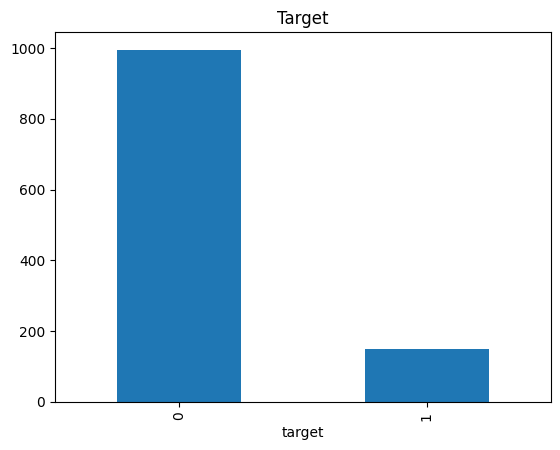

In [100]:
import matplotlib.pyplot as plt
merged_new.target.value_counts().plot(kind= 'bar')
plt.title('Target')

In [101]:
import imblearn

In [102]:
from imblearn.over_sampling import SMOTE

In [103]:
smote = SMOTE()

In [104]:
x_smote, y_smote = smote.fit_resample(x_train, y_train)

In [105]:
import seaborn as sns

XGboost

In [106]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()

In [107]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

In [108]:
xgboost_model = xgb.XGBClassifier(random_state=32)

xgboost_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=32, ...)

In [109]:
tscv = TimeSeriesSplit(n_splits=3)

In [110]:
tscv = TimeSeriesSplit(n_splits=3)
param_grid = {'gamma': [0,0.2,0.3, 0.5,0.7, 0.8,1],
              'max_depth': [3, 4, 5,7,6,8,9,10],
              'n_estimators': [50, 100,150, 200],
             'eta': np.linspace(0.01,0.2,5)
        }
xgb_gridsearch = GridSearchCV(xgboost_model, param_grid, verbose=3, cv= tscv, n_jobs=-1, scoring='f1_macro')

In [111]:
xgb_gridsearch

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, im...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=32, ...),
             n_jobs=-1,
             param_grid={'eta': array([0.01  , 0.0575, 0.105 , 0.1525, 0.2   ]),
                         'gamma': [0, 0.2, 0.3, 0.5, 0.7, 0.8, 1],
                         'max_depth': [3, 4, 5, 7, 6, 8, 9, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1_macro', verbose=3)

In [112]:
print('various values passed for gamma are, ',param_grid['gamma'])
print('various values passed for max depth are, ',param_grid['max_depth'])
print('various values passed for base estimators are, ',param_grid['n_estimators'])
print('various values passed for learning rate are, ',param_grid['eta'])

various values passed for gamma are,  [0, 0.2, 0.3, 0.5, 0.7, 0.8, 1]
various values passed for max depth are,  [3, 4, 5, 7, 6, 8, 9, 10]
various values passed for base estimators are,  [50, 100, 150, 200]
various values passed for learning rate are,  [0.01   0.0575 0.105  0.1525 0.2   ]


In [113]:
xgb_gridsearch.fit(x_smote,y_smote)

Fitting 3 folds for each of 1120 candidates, totalling 3360 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, im...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=32, ...),
             n_jobs=-1,
             param_grid={'eta': array([0.01  , 0.0575, 0.105 , 0.1525, 0.2   ]),
                         'gamma': [0, 0.2, 0.3, 0.5, 0.7, 0.8, 1],
                         'max_depth': [3, 4, 5, 7, 6, 8, 9, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1_macro', verbose=3)

In [114]:
xgb_results = pd.DataFrame(xgb_gridsearch.cv_results_['params'])

In [115]:
xgb_results['test_score'] = xgb_gridsearch.cv_results_['mean_test_score']

In [116]:

xgb_results

,eta,gamma,max_depth,n_estimators,test_score
0,0.01,0.0,3,50,0.801223
1,0.01,0.0,3,100,0.929510
2,0.01,0.0,3,150,0.929510
3,0.01,0.0,3,200,0.929510
4,0.01,0.0,4,50,0.801223
...,...,...,...,...,...
1115,0.20,1.0,9,200,0.929510
1116,0.20,1.0,10,50,0.929510
1117,0.20,1.0,10,100,0.929510
1118,0.20,1.0,10,150,0.929510


In [117]:
xgb_results.test_score.nunique()

2

In [118]:
print(xgb_gridsearch.best_params_)

{'eta': 0.01, 'gamma': 0, 'max_depth': 3, 'n_estimators': 100}


In [119]:
xgb_clf= xgb.XGBClassifier(random_state=32, n_estimators =50,max_depth= 3,gamma = 0,eta=0.01 )

In [120]:
xgb_clf.fit(x_smote,y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric=None,
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [121]:
pred= xgb_clf.predict(x_test)

In [122]:
print('accuracy of XGBoost Classifier:', round(xgb_clf.score(x_test,y_test),2)*100 ,'%')

accuracy of XGBoost Classifier: 100.0 %


In [123]:
from sklearn.metrics import confusion_matrix, precision_score,recall_score,f1_score

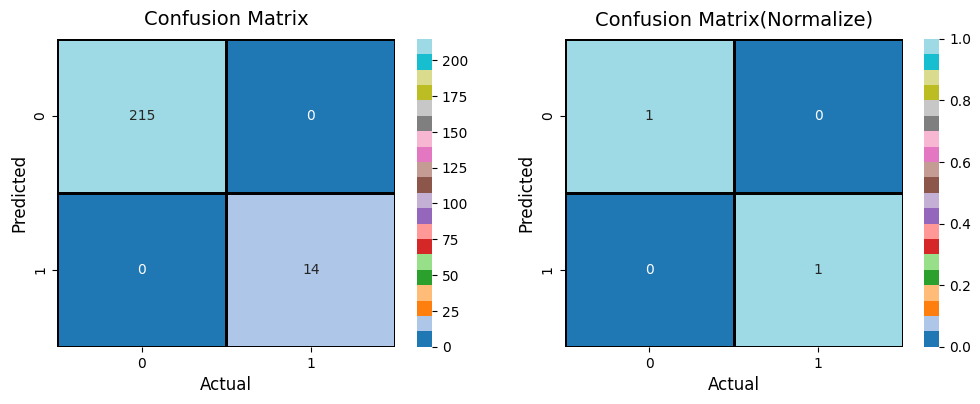

<Figure size 1000x800 with 0 Axes>

In [124]:
fig, (ax1, ax2) =plt.subplots(1,2, figsize=(12, 4))
plt.figure(figsize=(10,8))


sns.heatmap(confusion_matrix(y_test, pred,), annot=True, linewidth=2, linecolor='black', cmap='tab20',fmt='g',ax=ax1)
ax1.set_title('Confusion Matrix', fontsize=14, pad=10)
ax1.set_ylabel('Predicted',size=12)
ax1.set_xlabel('Actual', size=12)

sns.heatmap(confusion_matrix(y_test, pred,normalize='pred'), annot=True, linewidth=2, linecolor='black', cmap='tab20',fmt='g', ax=ax2)
ax2.set_title('Confusion Matrix(Normalize)', fontsize=14, pad=10)
ax2.set_ylabel('Predicted',size=12)
ax2.set_xlabel('Actual', size=12)


plt.show()

In [125]:
print('Precision:', round(precision_score(y_test, pred),2)*100 ,'%')
print('Recall:', round(recall_score(y_test, pred),2)*100 ,'%')
print('F1 Score:', round(f1_score(y_test, pred),2)*100 ,'%')

Precision: 100.0 %
Recall: 100.0 %
F1 Score: 100.0 %


In [126]:

y_pred_probs = xgb_clf.predict_proba(x_test)[:, 1]

In [127]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [128]:
from sklearn.metrics import ConfusionMatrixDisplay

In [129]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

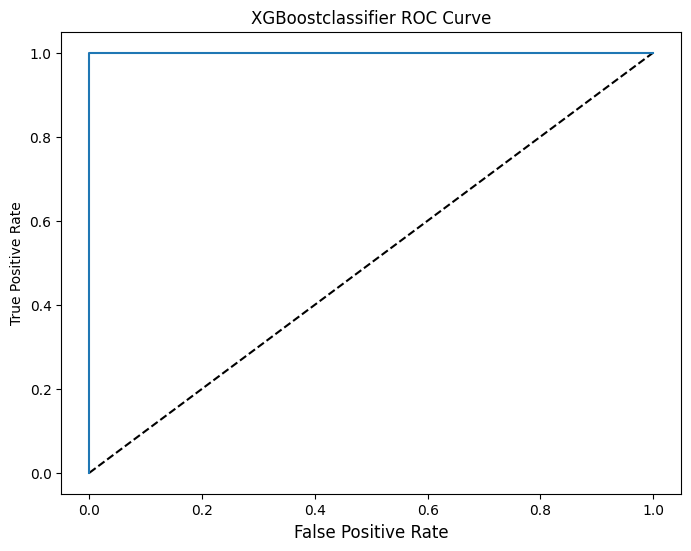

In [130]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', size= 12)
plt.ylabel('True Positive Rate')
plt.title('XGBoostclassifier ROC Curve', size= 12)
plt.show()

In [131]:
for i in range(3):
    print("The value for tpr is {0} and fpr is {1} at threshhold value {2}".format(tpr[i],fpr[i],thresholds[i]))

The value for tpr is 0.0 and fpr is 0.0 at threshhold value inf
The value for tpr is 1.0 and fpr is 0.0 at threshhold value 0.6964144110679626
The value for tpr is 1.0 and fpr is 1.0 at threshhold value 0.30358558893203735


In [132]:

from sklearn.metrics import roc_auc_score
print("the AUC score for XGBoost model" ,roc_auc_score(y_test, y_pred_probs))

the AUC score for XGBoost model 1.0


XGB Model

In [133]:
from imblearn.pipeline import make_pipeline as imbl_pipe
from imblearn.over_sampling import SMOTE

In [134]:
mean_fit_time= xgb_gridsearch.cv_results_['mean_fit_time']
mean_score_time= xgb_gridsearch.cv_results_['mean_score_time']
n_splits  = xgb_gridsearch.n_splits_ #number of splits of training data
n_iter = pd.DataFrame(xgb_gridsearch.cv_results_).shape[0] #Iterations per split

print(np.mean(mean_fit_time + mean_score_time) * n_splits * n_iter)

188.2327182292938


In [135]:
xgb_clf2= imbl_pipe(SMOTE(sampling_strategy='auto', random_state=32),xgb.XGBClassifier(random_state=32, n_estimators =50,
                                                                                       max_depth= 3,gamma = 0,eta=0.01 ))


In [136]:
merged_new.drop(['Weather','latitude','longitude','timestamp','timestamps'],axis= 1, inplace= True)

In [137]:
merged_new.head()

,rain,humidity,cloudiness,tidal_height,pixel_count,tidal_state_RISING,Weather_description_broken clouds,Weather_description_light rain,Weather_description_moderate rain,Weather_description_overcast clouds,target
0,0.0,0.173077,0.158979,1.0,0.071429,1.0,False,0.0,0.0,1.0,0
1,0.0,0.173077,0.213084,1.0,0.035714,1.0,False,0.0,0.0,1.0,0
2,0.0,0.096154,0.266363,1.0,0.035714,1.0,False,0.0,0.0,1.0,0
3,0.0,0.096154,0.322790,1.0,0.035714,1.0,False,0.0,0.0,1.0,0
4,0.0,0.096154,0.381467,1.0,0.017857,1.0,False,0.0,0.0,1.0,0


In [138]:
x= merged_new.iloc[:,:-1].values
y= merged_new.iloc[:,-1].values

In [139]:

from sklearn import model_selection

In [140]:

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}



results = model_selection.cross_validate(estimator=xgb_clf2,
                                          X=x,
                                          y=y,
                                          cv=tscv,
                                          scoring=scoring)

In [141]:
results

{'fit_time': array([0.21212196, 0.47443819, 0.1718049 ]),
 'score_time': array([0.01433563, 0.01708174, 0.04171181]),
 'test_accuracy': array([0.88111888, 1.        , 1.        ]),
 'test_precision': array([1., 1., 1.]),
 'test_recall': array([0.30612245, 1.        , 1.        ]),
 'test_f1_score': array([0.46875, 1.     , 1.     ])}

In [142]:
print('Recall score for xgboost is' ,np.mean(results['test_recall']))
print('Precision score for xgboost is' ,np.mean(results['test_precision']))
print('F1 score for xgboost is' ,np.mean(results['test_f1_score']))
print('Accuracy score for xgboost is' ,np.mean(results['test_accuracy']))

Recall score for xgboost is 0.7687074829931974
Precision score for xgboost is 1.0
F1 score for xgboost is 0.8229166666666666
Accuracy score for xgboost is 0.9603729603729604


Model Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       1.00      1.00      1.00        14

    accuracy                           1.00       229
   macro avg       1.00      1.00      1.00       229
weighted avg       1.00      1.00      1.00       229



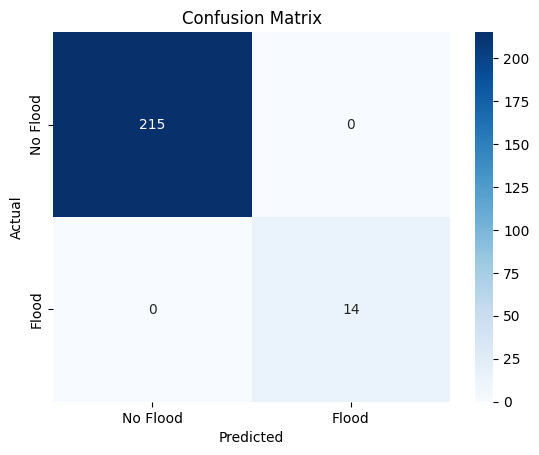

In [143]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert probabilities to class predictions using a threshold (e.g., 0.5)
y_pred_probs= np.where(y_pred_probs >= 0.5, 1, 0) # Values >=0.5 are assigned to 1 else to 0

# Now, y_pred is a binary variable and can be used with accuracy_score
accuracy = accuracy_score(y_test, y_pred_probs)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Show classification report (precision, recall, F1)
print("\nClassification Report:\n", classification_report(y_test, y_pred_probs)) # y_pred used here as well

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_probs) # y_pred used here as well
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Flood', 'Flood'], yticklabels=['No Flood', 'Flood'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

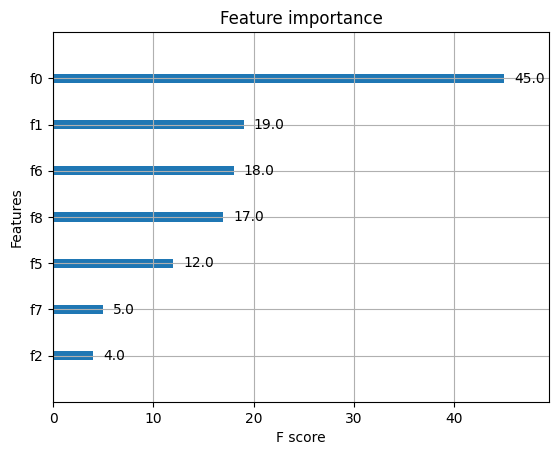

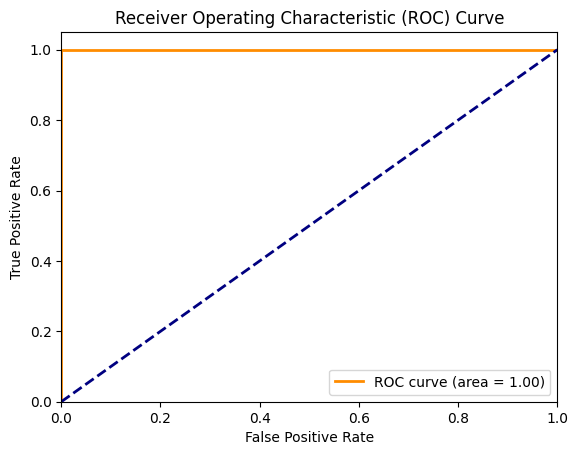

In [144]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
from xgboost import XGBClassifier # Assuming you're using XGBClassifier

# Assuming X and y are your features and target variable respectively
# This is just an example, replace with your actual training data
# X = ...
# y = ...

# Initialize and train the XGBoost model
xgb_model = XGBClassifier()  # Create an instance of the model
xgb_model.fit(X, y)  # Train the model

# Now you can plot the feature importance
plot_importance(xgb_model)
plt.show()

# Rest of the code (ROC curve) remains the same
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [156]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.load_model('xgb_model.json')

# Get feature names (if stored in model)
print(xgb_clf.get_booster().feature_names)

['humidity', 'cloudiness', 'tidal_height', 'tidal_state_RISING', 'Weather_description_light snow', 'Weather_description_moderate rain', 'Weather_description_light rain', 'Weather_description_overcast clouds', 'pixel_count']


In [155]:
xgb_clf = xgb.XGBClassifier()

# Assuming 'x_train' is your training data and it is a DataFrame
xgb_clf.fit(x_train, y_train)

# Save the model
xgb_clf.get_booster().feature_names = col  # Use the 'col' variable directly as it contains the column names
xgb_clf.save_model('xgb_model.json')

In [146]:
# Assume you have trained your XGBoost model like this
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

# Save the model to a file (either in binary or JSON format)
xgb_model.save_model('xgb_model.json')  # For JSON format
# or
xgb_model.save_model('xgb_model.bin')   # For binary format

In [147]:
import xgboost as xgb

# Create an XGBClassifier instance (or XGBRegressor, depending on your model type)
xgb_model = xgb.XGBClassifier()

# Load the model from file
xgb_model.load_model('xgb_model.json')  # If you saved in JSON format
# or
xgb_model.load_model('xgb_model.bin')   # If you saved in binary format

In [148]:
xgb_model.load_model("xgb_model.json")  # or .bin depending on the format

In [162]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import xgboost as xgb

# Load the XGBoost model
xgb_clf = xgb.XGBClassifier()
xgb_clf.load_model('xgb_model.json')

# Widgets for user inputs
cloudiness_input = widgets.FloatSlider(min=0, max=100, step=0.1, description='Cloudiness (%)')
tidal_input = widgets.FloatSlider(min=0, max=2, step=0.1, description='Tidal Height (m)')
tidal_state_input = widgets.ToggleButton(value=False, description='Tidal State Rising (Yes/No)')
humidity_input = widgets.FloatSlider(min=0, max=100, step=0.1, description='Humidity (%)')
pixel_count_input = widgets.FloatSlider(min=0, max=10000, step=10, description='Pixel Count')

# Widgets for weather description
weather_light_snow = widgets.ToggleButton(value=False, description='Light Snow (Yes/No)')
weather_moderate_rain = widgets.ToggleButton(value=False, description='Moderate Rain (Yes/No)')
weather_light_rain = widgets.ToggleButton(value=False, description='Light Rain (Yes/No)')
weather_overcast_clouds = widgets.ToggleButton(value=False, description='Overcast Clouds (Yes/No)')

# Create an output widget to display results
output = widgets.Output()

# Function to predict flood risk using your trained XGBoost model
def predict_flood(cloudiness, tidal_height, tidal_state_RISING, humidity,
                  pixel_count, light_snow, moderate_rain, light_rain, overcast_clouds):

    with output:
        output.clear_output()  # Clear previous outputs

        # Convert weather description inputs (True/False) to numerical values (0 or 1)
        light_snow_val = 1 if light_snow else 0
        moderate_rain_val = 1 if moderate_rain else 0
        light_rain_val = 1 if light_rain else 0
        overcast_clouds_val = 1 if overcast_clouds else 0
        tidal_state_RISING_val = 1 if tidal_state_RISING else 0

        # Placeholder value for the missing feature
        placeholder_feature = 0  # Adjust this if you identify the real missing feature

        # Create a feature vector with 10 features
        features = np.array([[humidity, cloudiness, tidal_height, tidal_state_RISING_val,
                              light_snow_val, moderate_rain_val, light_rain_val,
                              overcast_clouds_val, pixel_count, placeholder_feature]])

        # Debugging: Check raw features before prediction
        print("Raw Features: ", features)

        # Debugging: Check expected feature names
        print("Expected Features: ['humidity', 'cloudiness', 'tidal_height', 'tidal_state_RISING', "
              "'Weather_description_light snow', 'Weather_description_moderate rain', "
              "'Weather_description_light rain', 'Weather_description_overcast clouds', 'pixel_count', 'timestamp']")

        # Use XGBoost model to predict probabilities
        try:
            prediction_proba = xgb_clf.predict_proba(features)
        except ValueError as e:
            print(f"Error during prediction: {e}")
            return

        # Print probabilities (for debugging)
        print(f"Probabilities: No Flood: {prediction_proba[0][0]}, Flood: {prediction_proba[0][1]}")

        # Classify as 'Flood' if probability of class 1 (Flood) is greater than 0.5
        flood_probability = prediction_proba[0][1]  # Probability of 'Flood'
        result = 'Flood' if flood_probability > 0.5 else 'No Flood'

        # Display the result with flood probability
        print(f"Predicted flood risk: {result} (Flood probability: {flood_probability:.5f})")

# Link the widgets to the function and display output
widgets.interact(predict_flood,
                 cloudiness=cloudiness_input,
                 tidal_height=tidal_input,
                 tidal_state_RISING=tidal_state_input,
                 humidity=humidity_input,
                 pixel_count=pixel_count_input,
                 light_snow=weather_light_snow,
                 moderate_rain=weather_moderate_rain,
                 light_rain=weather_light_rain,
                 overcast_clouds=weather_overcast_clouds)

display(output)


interactive(children=(FloatSlider(value=0.0, description='Cloudiness (%)'), FloatSlider(value=0.0, description…

Output()

K means

In [163]:
from sklearn.cluster import KMeans

In [164]:
kmeans_model = KMeans(n_clusters= 2)

In [165]:
kmeans_model.get_params().keys()

dict_keys(['algorithm', 'copy_x', 'init', 'max_iter', 'n_clusters', 'n_init', 'random_state', 'tol', 'verbose'])

In [166]:
param_grid = {
              'max_iter': [300,400],
              'algorithm': ['lloyd', 'elkan', 'auto', 'full']
        }
kmeans_model_gridsearch = GridSearchCV(kmeans_model, param_grid, verbose=3,
                                       cv= tscv, n_jobs=4, scoring='f1_macro')

In [167]:
kmeans_model_gridsearch

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=KMeans(n_clusters=2), n_jobs=4,
             param_grid={'algorithm': ['lloyd', 'elkan', 'auto', 'full'],
                         'max_iter': [300, 400]},
             scoring='f1_macro', verbose=3)

In [168]:
kmeans_model_gridsearch.fit(x_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=KMeans(n_clusters=2), n_jobs=4,
             param_grid={'algorithm': ['lloyd', 'elkan', 'auto', 'full'],
                         'max_iter': [300, 400]},
             scoring='f1_macro', verbose=3)

In [169]:
kmeans_model_gridsearch.best_params_

{'algorithm': 'lloyd', 'max_iter': 300}

In [170]:
kmeans_model_gridsearch.best_params_

{'algorithm': 'lloyd', 'max_iter': 300}

In [171]:
kmeans_model.fit(x_smote)

KMeans(n_clusters=2)

In [172]:
pred= kmeans_model.predict(x_test)

In [173]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [178]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(kmeans_model, x_smote, y_smote, cv=tscv, scoring='accuracy')


In [179]:
scores.mean()

0.7931623931623931

In [180]:
mean_fit_time= kmeans_model_gridsearch.cv_results_['mean_fit_time']
mean_score_time= kmeans_model_gridsearch.cv_results_['mean_score_time']
n_splits  = kmeans_model_gridsearch.n_splits_ #number of splits of training data
n_iter = pd.DataFrame(kmeans_model_gridsearch.cv_results_).shape[0] #Iterations per split

print(np.mean(mean_fit_time + mean_score_time) * n_splits * n_iter)

0.6358809471130371


In [181]:
from sklearn import metrics

In [183]:
metrics.accuracy_score(y_test,kmeans_model.predict(x_test))

0.0

In [185]:
plot_df= pd.DataFrame({'Model': [ 'XGBoost Model', 'K-Means Clustering'],
                      'Accuracy':[98.03,50.17]})

Text(0, 0.5, 'Accuracy')

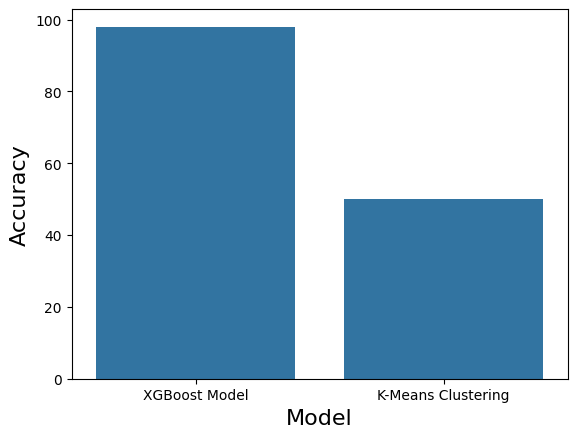

In [186]:
sns.barplot(data= plot_df, x='Model', y='Accuracy')
plt.xlabel('Model',size= 16)
plt.ylabel('Accuracy', size= 16)